**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных 
2. Исследование зависимостей и формулирование гипотез 
3. Построение моделей для прогнозирования оттока 
4. Сравнение качества полученных моделей. 

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

# 1. Описание данных

In [3]:
df = pd.read_csv('telecom_users.csv')

In [4]:
# замена названий колонок. Добавление пробела перед заглавными буквами с учетом аббревиатур, затем изменение регистра 

pattern = re.compile(r'((?<=[^\W[A-Z])[A-Z]|(?<=\S)[A-Z](?=[a-z]))')

df.columns = [str.lower(pattern.sub(r"_\1", i))  for i in df.columns.to_list()]
df.drop(columns=['unnamed: 0', 'customer_id'], inplace = True)  # удаляем столбцы которые не несут никакой информации 
df.head(1)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No


In [5]:
# обработка данных

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)      # уберем лишние пробелы 
df = df.replace(r'^\s*$', np.NaN, regex=True)                           # замена строк только с пробелами на np.Nan
df["total_charges"] = pd.to_numeric(df["total_charges"])                # замена типа данных в столбце 
df['total_charges'].fillna((df['total_charges'].mean()), inplace=True)  # замена пропущенных значений на средние 
df.head() # проверка

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


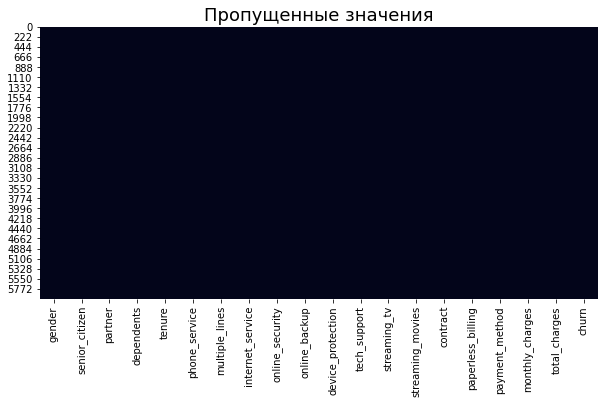

In [6]:
# визуализация пропущенных значений 

fig = plt.subplots(figsize=(10,5)) 
sns.heatmap(df.isnull(), cbar = False).set_title("Пропущенные значения", fontsize = 18);
# пропущенных значений нет 

In [7]:
# посмотрим на процентное соотношения уникальных значений в столбцах дф где тип данных не числовой 

df_values = df[df.select_dtypes(include = object).columns.to_list()]

for column in df_values:
    print(f'___________{column}___________')
    print(df_values[column].value_counts(normalize = True) * 100, '\n')


___________gender___________
Male      50.952222
Female    49.047778
Name: gender, dtype: float64 

___________partner___________
No     51.486803
Yes    48.513197
Name: partner, dtype: float64 

___________dependents___________
No     70.080187
Yes    29.919813
Name: dependents, dtype: float64 

___________phone_service___________
Yes    90.143669
No      9.856331
Name: phone_service, dtype: float64 

___________multiple_lines___________
No                  47.577681
Yes                 42.565987
No phone service     9.856331
Name: multiple_lines, dtype: float64 

___________internet_service___________
Fiber optic    43.885733
DSL            34.547277
No             21.566990
Name: internet_service, dtype: float64 

___________online_security___________
No                     49.816238
Yes                    28.616772
No internet service    21.566990
Name: online_security, dtype: float64 

___________online_backup___________
No                     43.518209
Yes                    34.9

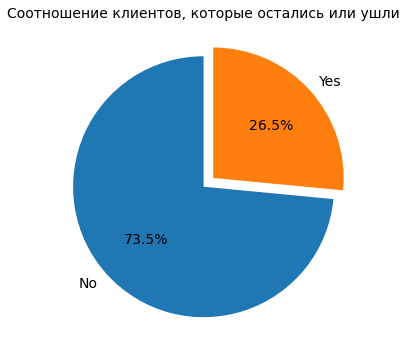

In [8]:
# процент клиентов которые остались или ушли 
explode = (0, 0.1) 
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(df['churn'].value_counts(), labels=df['churn'].unique(), 
       autopct='%1.1f%%', explode=explode, startangle=90, textprops={'fontsize': 14})
plt.title('Соотношение клиентов, которые остались или ушли', fontweight = 'medium', fontsize = 14)
plt.show()

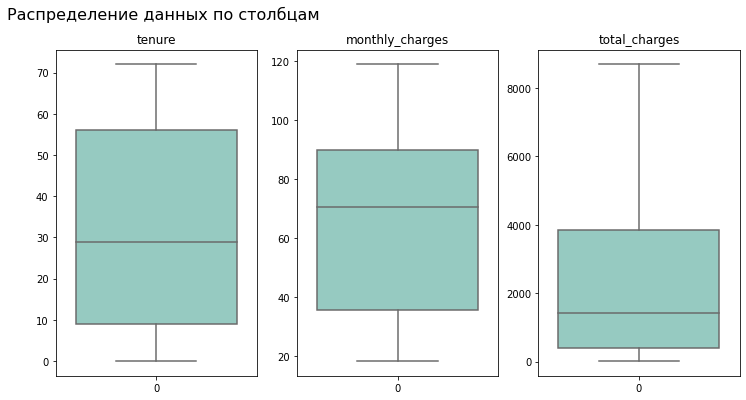

In [9]:
# распределение данных в столбцах 'tenure', 'monthly_charges', 'total_charges'

df_boxplot = df[['tenure', 'monthly_charges', 'total_charges']]
fig, axes = plt.subplots(1, 3, figsize=(4,6))

x = 0
for column in df_boxplot:
    sns.boxplot(data = df_boxplot[column], ax=axes[x], orient='V', palette="Set3").set_title(column, fontsize=12)
    x+=1
plt.subplots_adjust(right = 2.5)
plt.suptitle('Распределение данных по столбцам', fontsize = 16, fontweight = 'medium');

# в данных выбросов нет 

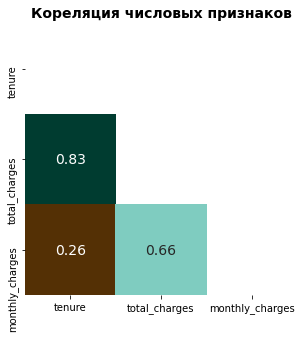

In [11]:
# корреляция числовых признаков, отберем значения корреляция которых выше 0.5

df_numder = df.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(5,5))
 
corr_m = df_numder.corr()                 # делаем матрицу 
corr_result = corr_m.stack()              # меняем форму 
filter_corr = corr_result[(corr_result != 1.0)  
                         &((corr_result > 0.5)  
                          |(corr_result < -0.5))].reset_index()  # применяем фильтр по значению корреляции 
 
columns = list(set(filter_corr['level_0']))
matrix = np.triu(df[columns].corr())
sns.heatmap(df[columns].corr(), annot=True, square=True, mask=matrix, cmap='BrBG',cbar = False, annot_kws={"size":14})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
ax.set_title('Кореляция числовых признаков', fontsize = 14, fontweight = 'bold');

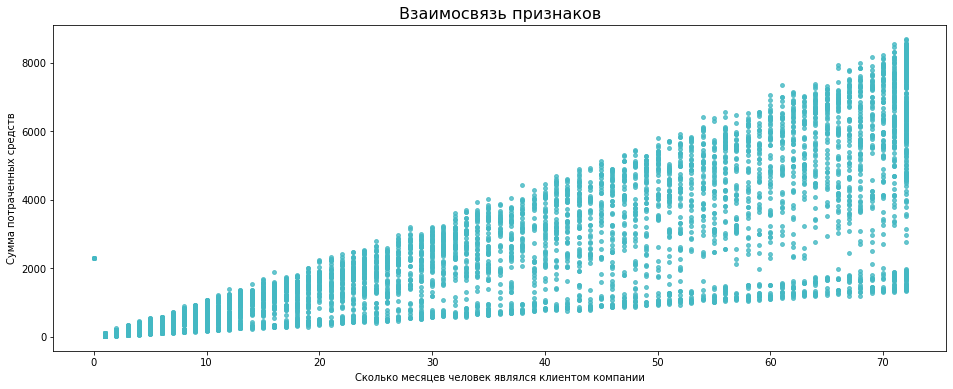

In [12]:
# поострим диаграмму распределения общей суммы потраченной на услуги за все время использования 
df[['tenure', 'total_charges']].plot.scatter(x = 'tenure', y='total_charges', 
                                             figsize=(16, 6), color = '#44B8C3', alpha = 0.8, s=15)
plt.title('Взаимосвязь признаков', fontsize = 16, fontweight = 'medium')
plt.xlabel('Cколько месяцев человек являлся клиентом компании')
plt.ylabel('Сумма потраченных средств');
plt.show()

# в принципе логично, чем дольше человек пользуется услугами, тем больше он платит
# поскольку эти столбцы сильно скоррелированы (0.83) один их них для моделей лучше убрать 
# (в среднем модели показывали результат без этого признака лучше, до метаалгоритм показывал 0.836, без него 0.838)

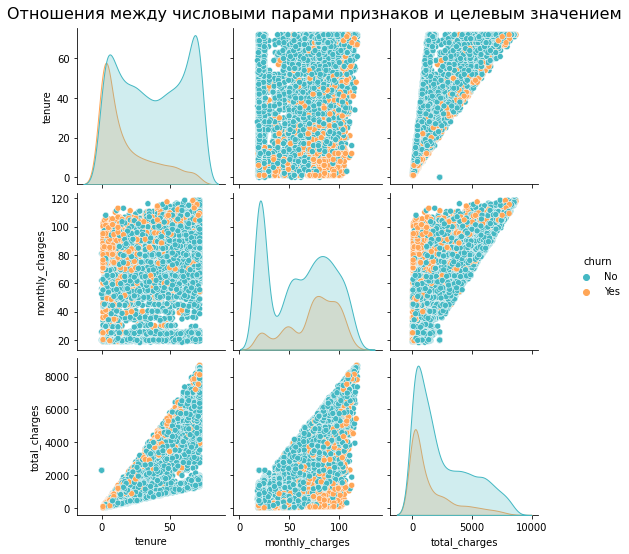

In [33]:
# рассмотрим числовые столбцы на взаимосвязь 
sns.pairplot(df[['tenure', 'monthly_charges','total_charges', 'churn']], 
             hue="churn", palette = dict(No = '#44B8C3', Yes = '#FFA657'))
plt.suptitle('Отношения между числовыми парами признаков и целевым значением', y=1.02, fontsize=16, fontweight='medium');

In [35]:
# кодируем данные для подачи признаков в числовом виде

from sklearn import preprocessing
df_code = df.apply(preprocessing.LabelEncoder().fit_transform)
df_code.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,71,2979,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,1016,4182,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,772,3675,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,455,858,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,407,513,0


# 2. Исследование зависимостей и формулирование гипотез

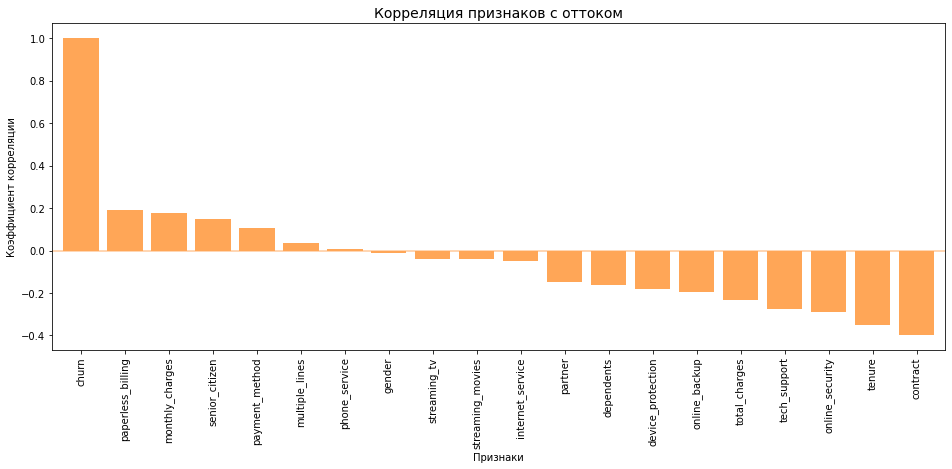

In [36]:
# посмотрим на корреляцию оттока c другим признаками 
plt.figure(figsize=(16,6))

df_code.corr()['churn'].sort_values(ascending = False).plot(kind='bar', width = 0.8, color = '#FFA657', fontsize = 10)
plt.hlines(df_code['churn'].median(), xmin = -1, xmax = len(df_code['churn']), color= '#FFA657', alpha = 0.6)
plt.title('Корреляция признаков с оттоком', fontweight = 'medium', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции');

# можно сделать вывод, что признаки находящиеся в центре, 
# практически никак не коррелируют с оттоком, их для моделей можно не рассматривать 
# это колонки phone_service, gender, streaming_tv, streaming_movies, internet_service

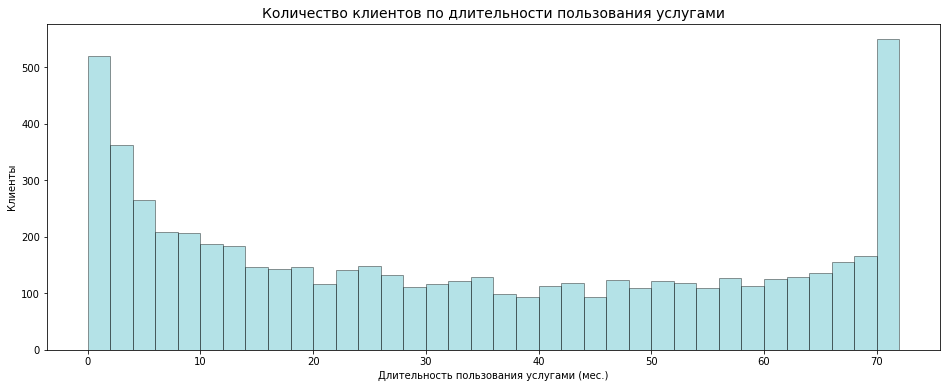

In [205]:
# посмотрим, как распределились клиенты по срокам пользования услугами 

plt.figure(figsize=(16,6))
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, color =  '#44B8C3')
ax.set_ylabel('Клиенты')
ax.set_xlabel('Длительность пользования услугами (мес.)')
ax.set_title('Количество клиентов по длительности пользования услугами', fontweight = 'medium', fontsize=14);

# клиенты, которые остались пришли совсем недавно или пользуются более 70 месяцев, 
# это вероятное влияние длительности контракта 

<AxesSubplot:>

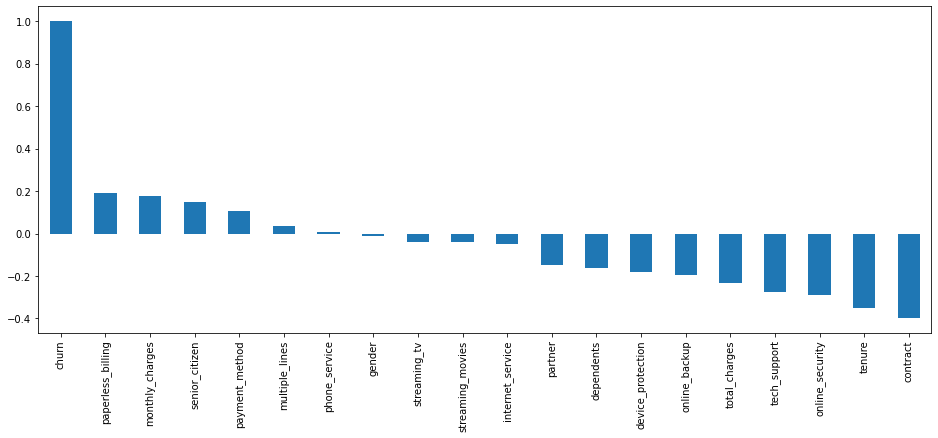

In [37]:
# продублируем здесь график, который был выше для отбора признаков
# забываем про total_charges даже не смотря на то, что она достаточно сильно отрицательно скоррелирована с churn 

plt.figure(figsize=(16,6))
df_code.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [91]:
# тут выбираем признаки для подачи в модель, чем более положительно или отрицательно коррелируют, забираем. 
col = ['contract', 'tenure', 'online_security', 'tech_support', 'paperless_billing', 'device_protection',
       'monthly_charges', 'online_backup', 'senior_citizen', 'payment_method']

In [92]:
df.head(1)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No


# 3. Построение моделей для прогнозирования оттока

In [93]:
# импорты библиотек 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (GridSearchCV, train_test_split)
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier
import math as mt

**Из всего многообразия моделей выберем следующие алгоритмы:**
   -  RandomForestClassifier - так как применяется для задач классификации. Модель гибкая, обладают очень высокой точностью и  не требует масштабирование данных. 
   - LogisticRegressionCV - классификатор логистической регрессии с кросс-валидацией, несложная модель классификация малого числа объектов на малое число классов.
   - DecisionTreeClassifie - модель классификации, которая не требует подготовки данных и является надежным методом
   - GaussianNB - "наивный" алгоритм классификации, простой, мощный хорошо работает там, где объем данных ограничен
   -  XGBClassifier - реализация деревьев решений с градиентным усилением
   -  GradientBoostingClassifier - метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.
   - KNeighborsClassifier - алгоритм классификации где на основе классов ближайших соседей выносится решение касательно нового объекта
   - AdaBoostClassifier - является адаптивным классификатором, чувствителен к шуму в данных и выбросам, менее подвержен переобучению по сравнению с другими алгоритмами. 
   -  SVC - использует гиперплоскость, чтобы классифицировать данные по 2 классам.
   
   
StackingClassifier - способ ансамблирования алгоритмов.


In [94]:
# разбиение данных на тренировочный и валидационный 

x = df_code[col]         # в col список отобранных нами признаков 
y = df_code['churn']     # отделяем целевую переменную 
print(x.shape, y.shape)  # проверяем размерность 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=17)
print(f'После разбиения x_train {x_train.shape} y_test {y_test.shape}')

(5986, 10) (5986,)
После разбиения x_train (4788, 10) y_test (1198,)


In [95]:
data = pd.DataFrame() # создаем пустой датафрейм для сбора названия моделей, их скора и лучших гиперпараметров 

**Дальнейший алгоритм действий такой**
 - создаем сетку параметров
 - создаем модель, учим, получаем предсказание
 - получаем точность
 - добавляем параметры в датафрейм
 
Далее действия с каждой моделью повторяются 

In [96]:
# подбор для модели RandomForestClassifier с помощью GridSearchCV оптимальных параметров 

params_rfc = {'n_estimators': range(100, 150, 5),                              # словарь с параметрами для гридсерча 
              'max_depth': range(4, 7, 1),
              'n_jobs' : [-1],
              'min_samples_split' : [0.000001],
              'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier(random_state = 17)   # создаем модель
rfc_GS =  GridSearchCV(rfc, params_rfc)           # запускаем поиск лучших параметров 
rfc_GS.fit(x_train, y_train)                      # тренируем 
best_params_1 = rfc_GS.best_params_               # выводим лучшие параметры 
print(best_params_1) 

pred = rfc_GS.predict(x_test)                     # получаем предсказание 
score = roc_auc_score(pred, y_test)               # оцениваем модель 
print(f'roc_auc_score {score}')                   # выводим оценку модели 


params_data = pd.DataFrame({'best_params': [best_params_1],        # создаем словарь для добавления в дф data 
                            'model': ['RandomForestClassifier'],   # и добавляем в него интересующие нас параметры 
                            'score': [score]}) 
data = data.append(params_data)                                    # записываем в data 

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 1e-06, 'n_estimators': 145, 'n_jobs': -1}
roc_auc_score 0.7521501317635944


In [97]:
params_lr = {'Cs' : [6,7],
             'cv' : [4,5],
             'n_jobs' : [-1],
             'solver': ['lbfgs'],
             'multi_class' : ['auto', 'ovr', 'multinomial'],
             'max_iter': [700, 1000]}

lr = LogisticRegressionCV(random_state = 17)
lr_GS = GridSearchCV(lr, params_lr)
lr_GS.fit(x_train, y_train)
best_params_2 = lr_GS.best_params_
print(best_params_2)

pred = lr_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_2], 
                            'model': ['LogisticRegressionCV'],
                            'score': [score]}) 
data = data.append(params_data) 

{'Cs': 7, 'cv': 4, 'max_iter': 700, 'multi_class': 'multinomial', 'n_jobs': -1, 'solver': 'lbfgs'}
roc_auc_score 0.745831223628692


In [98]:
params_dtc = {'max_depth': range(2, 5, 1)}

dtc = DecisionTreeClassifier(random_state = 17)
dtc_GS = GridSearchCV(dtc, params_dtc)
dtc_GS.fit(x_train, y_train)
best_params_3 = dtc_GS.best_params_
print(best_params_3)

pred = dtc_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_3], 
                            'model': ['DecisionTreeClassifier'],
                            'score': [score]}) 

data = data.append(params_data) 

{'max_depth': 3}
roc_auc_score 0.7162886367134482


In [99]:
params_cvs = {'C' : [3, 10],
              'kernel':['rbf']}

cvs = SVC(probability = True, random_state = 17)
cvs_GS = GridSearchCV(cvs, params_cvs)
cvs_GS.fit(x_train, y_train)
best_params_4 = cvs_GS.best_params_
print(best_params_4)

pred = cvs_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_4], 
                            'model': ['SVC'],
                            'score': [score]}) 

data = data.append(params_data) 

{'C': 10, 'kernel': 'rbf'}
roc_auc_score 0.7323950197200525


In [100]:
xgb_params = {'n_estimators': range(10, 25, 2),
              'learning_rate': [0.1, 0.2, 0.3],
              'n_jobs' : [0]}

xgb = XGBClassifier(random_state = 17)
xgb_GS = GridSearchCV(xgb, xgb_params)
xgb_GS.fit(x_train, y_train)
best_params_5 = xgb_GS.best_params_
print(best_params_5)

pred = xgb_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_5], 
                            'model': ['XGBClassifier'],
                            'score': [score]}) 

data = data.append(params_data) 

{'learning_rate': 0.2, 'n_estimators': 18, 'n_jobs': 0}
roc_auc_score 0.7504698041018293


In [101]:
params_knn = { 'n_neighbors' : range(6, 10, 2),
             'weights' : ['uniform'],
             'algorithm' : ['auto'],
             'n_jobs': [-1],
             'leaf_size': [1,2,3]}


knn = KNeighborsClassifier()
knn_GS = GridSearchCV(knn, params_knn)
knn_GS.fit(x_train, y_train)
best_params_6 = knn_GS.best_params_
print(best_params_6)

pred = knn_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}') 


params_data = pd.DataFrame({'best_params': [best_params_6], 
                            'model': ['KNeighborsClassifier'],
                            'score': [score]}) 

data = data.append(params_data) 

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}
roc_auc_score 0.7076895316165287


In [102]:
params_gbc =  { 'learning_rate': [0.2, 0.3], 
                'n_estimators': range(20, 40, 2), 
                'max_depth': range(2, 4, 1),
                'min_samples_split' : [0.1, 0.2]}

gbc = GradientBoostingClassifier()
gbc_GS = GridSearchCV(gbc, params_gbc)
gbc_GS.fit(x_train, y_train)
best_params_7 = gbc_GS.best_params_
print(best_params_7)

pred = gbc_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_7], 
                            'model': ['GradientBoostingClassifier'],
                            'score': [score]}) 

data = data.append(params_data) 

{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 34}
roc_auc_score 0.7449185924369747


In [103]:
params_ada = {'n_estimators': range(90, 130, 5),
              'learning_rate':  [0.2, 0.3],
              'algorithm' : ['SAMME', 'SAMME.R']}

ada = AdaBoostClassifier(random_state = 17)
ada_GS = GridSearchCV(ada, params_ada)
ada_GS.fit(x_train, y_train)
best_params_8 = ada_GS.best_params_
print(best_params_8)

pred = ada_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}') 


params_data = pd.DataFrame({'best_params': [best_params_8], 
                            'model': ['AdaBoostClassifier'],
                            'score': [score]}) 

data = data.append(params_data) 

{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 125}
roc_auc_score 0.7489111498257841


In [104]:
params_clf = {'var_smoothing': [0.001, 0.0002, 0.0003]}


clf = GaussianNB()
clf_GS = GridSearchCV(clf, params_clf)
clf_GS.fit(x_train, y_train)
best_params_9 = clf_GS.best_params_
print(best_params_9)

pred = clf_GS.predict(x_test)
score = roc_auc_score(pred, y_test)
print(f'roc_auc_score {score}')


params_data = pd.DataFrame({'best_params': [best_params_9], 
                            'model': ['GaussianNB'],
                            'score': [score]}) 

data = data.append(params_data) 

{'var_smoothing': 0.0003}
roc_auc_score 0.7596659264905711


**Поскольку модели показывают примерно одинаковый результат, используем стекинг**

In [105]:
estimators = [('rfc', RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 145, min_samples_split = 0.000001, n_jobs = -1, random_state = 17)), 
              ('lrc', LogisticRegressionCV(Cs = 6, cv= 4, max_iter = 700, multi_class = 'multinomial', n_jobs= -1, solver = 'lbfgs', random_state = 17)), 
              ('dtc', DecisionTreeClassifier(max_depth = 3, random_state = 17)), 
              ('svc', SVC(kernel='rbf', C=10, probability = True, random_state = 17)), 
              ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs =-1, n_neighbors = 8, weights= 'uniform')), 
              ('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate =  0.3, n_estimators = 125, random_state = 17)), 
              ('clf', GaussianNB(var_smoothing = 0.0003)), 
              ('xgb', XGBClassifier(learning_rate = 0.2, n_estimators = 18, n_jobs = 0, random_state = 17))] 


# финальный алгоритм 
final_estimator = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, 
                                             n_estimators = 30, min_samples_split = 0.1, 
                                             random_state = 17) 
# используем стекинг 
reg = StackingClassifier(estimators = estimators, 
                         final_estimator = final_estimator, 
                         stack_method = 'predict_proba',
                         n_jobs = -1)

# тренируем и делаем предсказание 
reg.fit(x_train, y_train)
prediction = reg.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, prediction)
print(score)


params_data = pd.DataFrame({'best_params': ['Nan'], 
                            'model': ['Meta'],
                            'score': [score]}) 

data = data.append(params_data)

0.8370795807941901


In [106]:
# посмотрим дф с собранными данными 
data = data.reset_index().sort_values(by = 'score')
data

,index,best_params,model,score
5,0,"{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs'...",KNeighborsClassifier,0.707690
2,0,{'max_depth': 3},DecisionTreeClassifier,0.716289
3,0,"{'C': 10, 'kernel': 'rbf'}",SVC,0.732395
6,0,"{'learning_rate': 0.2, 'max_depth': 3, 'min_sa...",GradientBoostingClassifier,0.744919
1,0,"{'Cs': 7, 'cv': 4, 'max_iter': 700, 'multi_cla...",LogisticRegressionCV,0.745831
7,0,"{'algorithm': 'SAMME.R', 'learning_rate': 0.3,...",AdaBoostClassifier,0.748911
4,0,"{'learning_rate': 0.2, 'n_estimators': 18, 'n_...",XGBClassifier,0.750470
0,0,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",RandomForestClassifier,0.752150
8,0,{'var_smoothing': 0.0003},GaussianNB,0.759666
9,0,Nan,Meta,0.837080


# 4. Сравнение качества моделей 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'KNeighborsClassifier'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'LogisticRegressionCV'),
  Text(5, 0, 'AdaBoostClassifier'),
  Text(6, 0, 'XGBClassifier'),
  Text(7, 0, 'RandomForestClassifier'),
  Text(8, 0, 'GaussianNB'),
  Text(9, 0, 'Meta')])

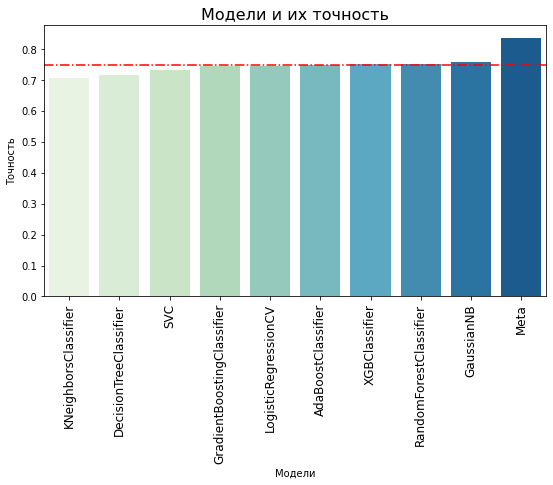

In [132]:
# отобразим точность каждой модели
plt.figure(figsize=(9,5))

sns.barplot(x ='model', y = 'score', data = data, palette = 'GnBu')
plt.axhline(data['score'].median(), c='r', linestyle  = '-.')
plt.xlabel('Модели')
plt.ylabel('Точность')
plt.title('Модели и их точность', fontweight = 'medium', fontsize =  16)
plt.xticks(rotation = 90, fontsize =  12)

**Выводы:**
   - худшей моделью оказалась KNN, это может быть связано с тем, что  данные имеют много входных переменных и большое число признаков в имеют нулевые значения
   - так же качество сильно ниже медианы показала модель DecisionTreeClassifier, в этом алгоритме сложный поиск оптимального дерева решений: это приводит к необходимости использования эвристики.
   - модель SVC так же показала качество ниже медианы, данный алгоритм легко может спутать объекты, которые похожи на объекты другого класса.
   - лучший результат показал алгоритм со стекингом так как известно, что если обучить несколько разных алгоритмов в задаче классификации — голосование по большинству, часто превосходят по качеству все эти алгоритмы.